# <center>Лабораторна робота №1 з дисципліни "Машинне навчання".
# <center>Виконав: Полозюк Дмитро, ДА-12.

Підключимо потрібні модулі:

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Напишемо функцію для завантаження даних, потрібних для виконання цієї лабораторної роботи:

In [18]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    x = data[:, 1]
    y = data[:, 2]
    return x, y

Завантажимо дані для навчання моделі у відповідні змінні:

In [19]:
x_train, y_train = load_data("lab_1_train.csv")
x_train, y_train

(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ]),
 array([20.14901425, 19.97872273, 20.2347106 , 20.51751502, 20.01056207,
        20.03076901, 20.59497597, 20.37164456, 20.02077385, 20.34458619,
        20.06299489, 20.0825033 , 20

Зобразимо точковий графік з навчальною вибіркою:

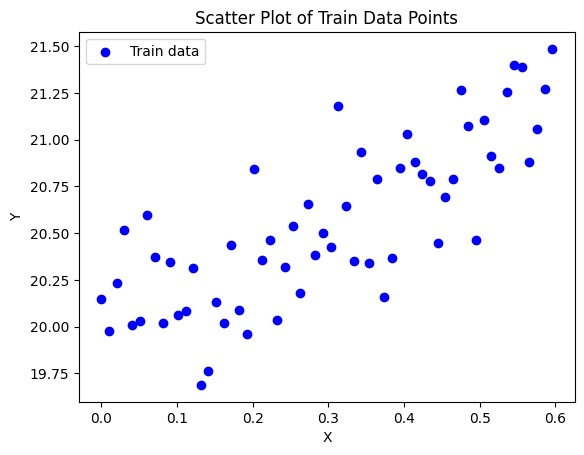

In [20]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Train Data Points')
plt.legend()
plt.show()

Більш-менш спостерігається лінійна залежність. Отже, реалізуємо модель лінійної регресії.

In [21]:
def linear_regression(intercept, slope, x):
    return intercept + slope * x

За завданням, використаємо mean squared error як функцію втрат:

In [22]:
def mean_squared_error(y_actual, y_predicted):
    return np.mean((np.array(y_predicted) - np.array(y_actual)) ** 2)

У класичному градієнтному спуску використовується градієнт функції витрат. Спростивши заздалегідь градієнт функції витрат mean squared error, отримуємо наступну функцію для розрахунку градієнту:

In [23]:
def mean_squared_error_derivatives(y_actual, y_predicted, x):
    errors = np.array(y_predicted) - np.array(y_actual)
    derivative_intercept = (2 / errors.size) * np.sum(errors)
    derivative_slope = (2 / errors.size) * np.sum(errors * x)
    return derivative_intercept, derivative_slope

Отже, маючи функції самої лінійної регресії, витрат і її градієнту, залишилося навчити модель лінійної регресії (визначити відповідні intercept і slope коефіцієнти лінійної регресії). Напишемо для цього наступну функцію:

In [24]:
def train_linear_regression_model(x_train, y_train, learning_rate=0.01, tolerance=0.000001):
    intercept, slope = np.random.normal(), np.random.normal()

    y_predicted = linear_regression(intercept, slope, x_train)
    loss = mean_squared_error(y_train, y_predicted)

    delta, epoch_index = 1000, 0

    while tolerance < delta:
        derivative_intercept, derivative_slope = mean_squared_error_derivatives(y_train, y_predicted, x_train)

        intercept -= learning_rate * derivative_intercept
        slope -= learning_rate * derivative_slope

        y_predicted = linear_regression(intercept, slope, x_train)
        current_loss = mean_squared_error(y_train, y_predicted)

        delta = np.abs(loss - current_loss)
        loss = current_loss
        epoch_index = epoch_index + 1

        print(f'epoch = {epoch_index},  delta loss = {delta:.8f},  loss = {loss:.8f},  intercept = {intercept:.6f},  slope = {slope:.6f}')

    return intercept, slope

Завантажимо дані для перевірки побудованої далі моделі:

In [25]:
x_test, y_test = load_data("lab_1_test.csv")
x_test, y_test

(array([0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
        0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
        0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
        0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
        0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
        0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
 array([21.06836894, 21.17662554, 20.92062476, 20.91386529, 21.53668704,
        21.72000332, 21.3117303 , 21.65459522, 21.48222818, 21.20040347,
        21.5225601 , 21.8957544 , 21.44379764, 21.94414057, 20.70902596,
        21.76172227, 21.56146766, 21.46585335, 21.60328581, 20.99968892,
        21.55026005, 21.74349741, 22.09993387, 21.52128661, 21.45442162,
        21.5666446 , 22.01199437, 21.85620109, 21.61884972, 21.95196003,
        21.84730

Зобразимо графік тестових даних:

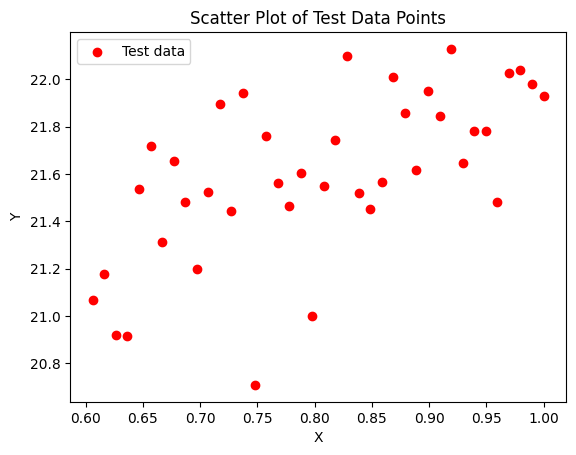

In [26]:
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data Points')
plt.legend()
plt.show()

Об'єднаємо у один графік тренувальні і тестові дані для наочності:

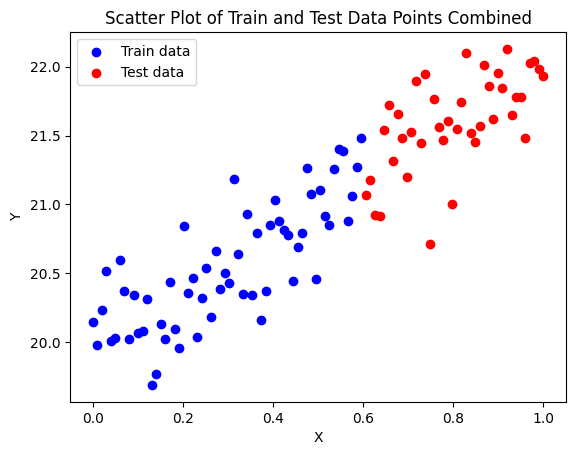

In [27]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Train and Test Data Points Combined')
plt.legend()
plt.show()

Тепер викличемо функцію побудови (тренування) лінійної регресії на тренувальних даних:

In [28]:
intercept, slope = train_linear_regression_model(x_train, y_train)

epoch = 1,  delta loss = 17.80936124,  loss = 395.16724316,  intercept = 0.607134,  slope = 0.227575
epoch = 2,  delta loss = 17.04041485,  loss = 378.12682831,  intercept = 1.004627,  slope = 0.347092
epoch = 3,  delta loss = 16.30466979,  loss = 361.82215853,  intercept = 1.393457,  slope = 0.463954
epoch = 4,  delta loss = 15.60069249,  loss = 346.22146604,  intercept = 1.773814,  slope = 0.578220
epoch = 5,  delta loss = 14.92711130,  loss = 331.29435473,  intercept = 2.145883,  slope = 0.689946
epoch = 6,  delta loss = 14.28261379,  loss = 317.01174094,  intercept = 2.509845,  slope = 0.799188
epoch = 7,  delta loss = 13.66594419,  loss = 303.34579675,  intercept = 2.865876,  slope = 0.906000
epoch = 8,  delta loss = 13.07590094,  loss = 290.26989581,  intercept = 3.214151,  slope = 1.010435
epoch = 9,  delta loss = 12.51133440,  loss = 277.75856141,  intercept = 3.554837,  slope = 1.112546
epoch = 10,  delta loss = 11.97114452,  loss = 265.78741690,  intercept = 3.888101,  slope 

Кількість епох при кожному виклику функції може різнитися, оскільки початкові intercept і slope генеруються рандомно у функції тренування лінійної регресії.

Порахуємо функцію втрат на тестових даних:

In [29]:
y_test_predicted = linear_regression(intercept, slope, x_test)
mean_squared_error(y_test, y_test_predicted)

0.07538290155022116

Тепер візуалізуємо на одному графіку тренувальні, тестові дані і лінію побудованої моделі лінійної регресії:

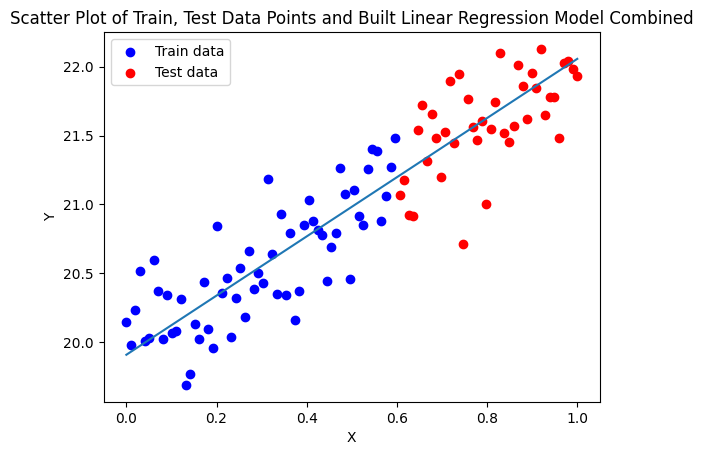

In [30]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot( [0, 1], [linear_regression(intercept, slope, 0), linear_regression(intercept, slope, 1)] )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Train, Test Data Points and Built Linear Regression Model Combined')
plt.legend()
plt.show()

Як видно, побудована модель лінійної регресії є доволі точною.